#목표


#데이터 살펴보기


In [ ]:
#프로젝트를 진행함에 필요한 모듈을 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#한글화
plt.rc('font', family='AppleGothic')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,583 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
#파이널프로젝트_RAW_210329_210926.xlsx 마운팅 후 DataFrame으로 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/미니프로젝트/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


| 컬럼 | 설명 |
| ---- | ----|
| id | 데이터 처리 내역 |
| customer_id | 고객 고유 번호 |
| course_id | 강의 고유 번호 |
| type    | 고객의 요청사항 종류 |
| state                   | type의 진행상황 |
| course_title            | 강의 제목 |
| category_title          | 강의 카테고리 제목 |
|format         | 강의 과정 분류 종류|
| completed_at            | 강의 결제 완료 시각|
| transaction_amount      | 실 결제 금액|
| coupon_title            | 쿠폰명|
| coupon_discount_amount  | 할인된 금액|
| sale_price              | 판매 금액|
| tax_free_amount    | 면세액 |
| pg                      | 결제대행사 |
| method                  | 결제 방법|
| subcategory_title       | 강의 부 카테고리 제목|
| marketing_start_at      | 해당 강의가 개시된 날 |


____
<유의할 사항>
- 쿠폰 말고도 이벤트같은 다른 조건에 의한 할인도 있다
- 'customer_id'는 중복값이 있으므로 순수 고객수 파악하려면 전처리 필요
- 'tax_free_amount' 데이터는 개인 보안 문제로 제거해주기
- 'course_id'의 결측치는 폐강으로 추측
- 'pg'의 결측치는 주어진 결제대행사 외의 기업을 뜻한다.

#데이터 전처리

>데이터 타입과 결측값 확인하기

1. 데이터 타입 확인

In [ ]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

2. 결측치 확인 및 제거

In [ ]:
#결측치 확인
df.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [ ]:
# 카테고리가 누락된 강의들은 폐강된 강의들이므로 해당 row를 제거해준다
df = df.dropna(subset=['category_title'])

>사용하지 않는 컬럼 제거

- id는 단순히 자료 처리 순서이므로 삭제한다.

- tax_free_amount는 보안상의 이유로 삭제한다.

In [ ]:
# 'id'와'tax_free_amount' 컬럼 제거
df = df.drop(['id','tax_free_amount'],axis = 'columns')
df.head()

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,NaN,VBANK,개발자 커리어,NaT
1,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,NaN,CARD,영상 편집,2020-12-02
2,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,NaN,CARD,NaN,2021-03-04
3,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,NaN,CARD,NaN,2021-03-04
4,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [ ]:
#coupon_title NaN값 빈칸''으로 변경
df['coupon_title'] = df['coupon_title'].replace(np.NaN,'')

#sale_price, coupon_discount_amount  NaN값 0.0으로 변경
df['sale_price'] = df['sale_price'].replace(np.NaN,0.0)
df['coupon_discount_amount'] = df['coupon_discount_amount'].replace(np.NaN,0.0)

In [ ]:
df.isna().sum()

customer_id                   0
course_id                  5183
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
pg                        15058
method                    13095
subcategory_title         19805
marketing_start_at        17955
dtype: int64

>카테고리 컬럼 수정

In [ ]:
df['category_title'].value_counts().to_frame()

,category_title
프로그래밍,34430
데이터사이언스,14076
업무 생산성,13323
디자인,12009
영상/3D,10260
마케팅,9857
부동산/금융,5523
투자/재테크,2501
크리에이티브,2250
교육,1031


  위의 표를 보고 처리할 과정을 정리해보았다.
  
  <수정 할 목록>
1. 띄어쓰기 차이로 다른 강의로 구분된 '데이터사이언스'와 '데이터 사이언스'를 합쳐준다.
2. 디자인 카테고리에 서브 카테고리로 속해있는 '일러스트' 카테고리를 '디자인'카테고리에 편입시켜준다.
3. '크리에이티브','교육','지식콘텐츠','비즈니스','파이낸스','관리' 카테고리는 현재 폐강된 카테고리들로 삭제해준다.

In [ ]:
# 카테고리 변경
df =df.replace({'category_title':{'데이터 사이언스':'데이터사이언스'}})
df =df.replace({'category_title':{'일러스트':'디자인'}})


# 불필요한 카테고리 삭제
df = df[df.category_title != '크리에이티브']
df = df[df.category_title != '교육']
df = df[df.category_title != '지식콘텐츠']
df = df[df.category_title != '비즈니스']
df = df[df.category_title != '파이낸스']
df = df[df.category_title != '관리']

df.category_title.value_counts()

프로그래밍      34430
데이터사이언스    14085
업무 생산성     13323
디자인        12010
영상/3D      10260
마케팅         9857
부동산/금융      5523
투자/재테크      2501
Name: category_title, dtype: int64

> 순수 결제내역 / 순수 환불내역 분류하기

In [ ]:
# 결제가 완료된 사람의 데이터
df_pc = df[(df['type'] == 'PAYMENT') & (df['state'] == 'COMPLETED')]

# 환불이 완료된 사람의 데이터
df_rc =df[(df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]


# 결제가 완료된 사람과 환불이 완료된 사람의 데이터를 합쳐준다.
df_total = pd.merge(df_pc,df_rc,how='outer')


# 합친 데이터 중에서 'customer_id' , 'course_title','coupon_title' 모두를 만족하는 중복값을 가장 최신값만 남기고 제거해준다.
df_total = df_total.drop_duplicates(['customer_id' , 'course_title','coupon_title'],keep = 'last')
df_total['type'].value_counts()

PAYMENT    49625
REFUND      3645
Name: type, dtype: int64

예시

| 이용자 | 강의명 | 신청상태 | 할인|비고|
|---|---|---|---|--|
|나| A | 환불|x | 수집된 데이터 기간 이전에 구매|
|가| A | 구매| x| 나중에 환불로 구매내역 삭제|
|가| A | 환불 | x| |
|가| A |구매 | o| |
|다| A | 구매| o| |
|나| B |구매 | o|나중에 환불로 구매내역 삭제 |
|나| A |구매 | x| |
|가| C |구매 | o| |
|나| B |환불 | o| |

단, 같은 이용자가 같은 강의를 하나이상 구매하지않는다는 조건이다.

보통 구매한 강의를 환불하지 않고 추가구매를 하진 않으므로 위와 같은 조건을 설정하여 '순수 구매내역'과 '순수 환불 내역'을 분류해도 된다고 판단했다.

In [ ]:
# 중복값을 제거한 df_total 데이터 중 type이 payment면 패캠 이용자들의 순 구매 내역,
df_pay = df_total['type'] == 'PAYMENT'
df_pay = df_total[df_pay]


# type이 refund면 패캠 이용자들의 순 환불 내역이다.
df_refund = df_total['type'] == 'REFUND'
df_refund = df_total[df_refund]


#데이터 분포 확인하기

>할인금액에 따른 분석

- 얼마 할인해줬을 때, 가장 많은 결제를 이끌어냈는지

 1. 할인 받은사람 안받은사람 숫자 비율/ 매출
 2. 할인 타입별 총 수량, 매출
 3. 타입별(그래프 3개) 할인 금액에 따른 전체 결제 횟수, 전체 판매 금액



- 같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율



In [ ]:
#할인금액 분석에서 사용할 데이터 프레임 생성
df_onlypay = df_pay[['customer_id','sale_price','transaction_amount','coupon_discount_amount']]

In [ ]:
df_onlypay.describe()

,customer_id,sale_price,transaction_amount,coupon_discount_amount
count,49625.000000,4.962500e+04,4.962500e+04,4.962500e+04
mean,414064.275950,1.485807e+05,1.383958e+05,2.606430e+04
std,214407.781124,1.226493e+05,8.308029e+05,5.016188e+04
min,46.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,175425.000000,1.090000e+05,8.000000e+04,0.000000e+00
50%,501801.000000,1.340000e+05,1.165000e+05,0.000000e+00
75%,576464.000000,1.700000e+05,1.530000e+05,2.000000e+04
max,670891.000000,1.590000e+07,1.134000e+08,2.000000e+06


In [ ]:
# 얼마 할인받는지 계산
df_onlypay['discounted_amount'] = df_onlypay['sale_price'] - df_onlypay['transaction_amount']

# 실구매 가격 대비 할인율 계산
df_onlypay['discount_percent'] = df_onlypay['discounted_amount'] *100 / df_onlypay['sale_price']
df_onlypay['discount_percent'] = df_onlypay['discount_percent'].replace(np.inf,100.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
#쿠폰 할인외에 이벤트 할인받은 데이터가 있는지 확인

only_coupon = (df_onlypay['coupon_discount_amount'] > 0)
only_coupon.value_counts() 
#쿠폰 할인 받은 사람 : 23519  // 쿠폰 할인 못 받은 사람: 26106

only_teacher = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] < 0)
only_teacher.value_counts() 
#패스트캠퍼스 강사진 전용 이벤트 할인: 124

only_event = (df_onlypay['coupon_discount_amount'] != df_onlypay['discounted_amount']) & (df_onlypay['coupon_discount_amount'] == 0) & (df_onlypay['discounted_amount'] > 0)
only_event.value_counts() 
#이벤트 할인 받은 사람 : 1279   // 이벤트 할인 못 받은 사람: 48222 


not_discount = (df_onlypay['coupon_discount_amount'] == df_onlypay['discounted_amount']) & (df_onlypay['discounted_amount'] == 0)
not_discount .value_counts()

#할인 못받은 사람: 24703   // 할인 받은사람: 24922 

#할인 받은 사람: 23519 + 1279 + 124= 24922 명 (검산결과 맞음!)

False    24922
True     24703
dtype: int64

>구매 기록과 환불기록 분류하기

In [ ]:
# 할인 타입 컬럼 만들기
df_onlypay['discount_type'] = pd.Series()

# 쿠폰 할인을 안받고 구매한 그룹
df_not_discount = df_onlypay[not_discount]
df_not_discount['discount_type']='X'

# 쿠폰 할인을 받고 구매한 그룹
df_coupon = df_onlypay[only_coupon]
df_coupon['discount_type']='coupon'

# 이벤트 할인을 받고 구매한 그룹
df_event = df_onlypay[only_event]
df_event['discount_type']='event'

# 패스트캠퍼스 강사진 전용 이벤트 할인
df_only_teacher = df_onlypay[only_teacher]
df_only_teacher['discount_type']='only teacher'

#할인 타입 합치기
df_onlypay = pd.concat([df_not_discount,df_coupon,df_event])
df_onlypay

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

,customer_id,sale_price,transaction_amount,coupon_discount_amount,discounted_amount,discount_percent,discount_type
3,469860.0,263000.0,263000,0.0,0.0,0.000000,X
5,478031.0,299000.0,299000,0.0,0.0,0.000000,X
6,455311.0,149500.0,149500,0.0,0.0,0.000000,X
8,478051.0,118000.0,118000,0.0,0.0,0.000000,X
9,131687.0,81000.0,81000,0.0,0.0,0.000000,X
...,...,...,...,...,...,...,...
48175,655839.0,233000.0,72000,0.0,161000.0,69.098712,event
49628,664295.0,329000.0,309000,0.0,20000.0,6.079027,event
50118,666671.0,159000.0,139000,0.0,20000.0,12.578616,event
50244,667266.0,123000.0,113000,0.0,10000.0,8.130081,event


>할인율에 따라 분류

In [ ]:
#할인 받은 금액(%)에 따라 분류하는 함수 만들기
def func(x):
  if x == 0:
    return "비 할인"  
  elif  x < 10:
    return "~10%"
  elif x < 20:
    return "~20%"
  elif x < 30:
    return "~30%"
  elif  x < 40:
    return "~40%"
  elif  x < 50:
    return "~50%"
  elif  x < 60:
    return "~60%"
  elif  x < 70:
    return "~70%"
  elif  x < 80:
    return "~80%"
  elif  x < 90:
    return "~90%"
  elif x ==100:
    return "전액 할인"
  else:
    return "강사진 전용"

df_onlypay['discount_rate'] = (df_onlypay['discount_percent']).apply(func)

In [ ]:
df_onlypay['discount_rate'].value_counts()

비 할인      24703
~20%      11093
전액 할인      4683
~10%       3165
~30%       1324
~90%        963
강사진 전용      936
~40%        896
~80%        762
~70%        481
~60%        300
~50%        195
Name: discount_rate, dtype: int64

#시각화


1. 할인 타입별 결제 횟수, 비율, 총 판매 금액
2. 할인 타입별 매출과 할인율의 관계
3. 타입별(그래프 3개) 할인 금액에 따른 전체 결제 횟수, 전체 판매 금액



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: Runt

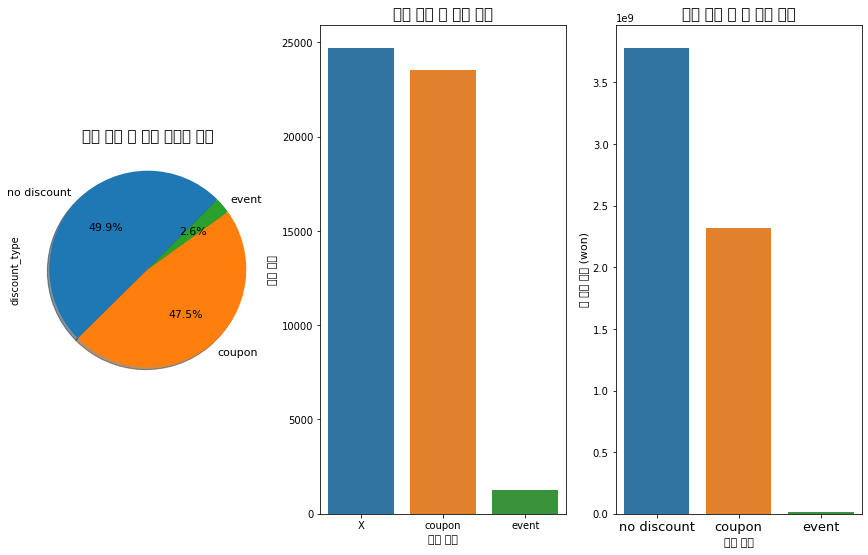

In [ ]:
#할인 타입별 결제횟수, 비율, 총 판매 금액
plt.figure(figsize=(15, 9))

#할인 타입 비율
plt.subplot(1,3,1)
labels = ['no discount','coupon','event']
df_onlypay["discount_type"].value_counts().plot.pie( explode=[0,0,0],labels = labels, autopct='%1.1f%%', shadow=True,startangle=45,fontsize = 11)
plt.title('할인 타입 별 강의 구매자 비율',fontsize = 15)


#할인 타입별 결제 횟수
plt.subplot(1,3,2)
sns.countplot(data=df_onlypay,x='discount_type')
plt.title('할인 타입 별 판매 수량',fontsize =15)
plt.xlabel('할인 타입',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)


#할인 타입별 총 판매 금액
revenue_of_discount_type = df_onlypay.groupby('discount_type').transaction_amount.sum()

plt.subplot(1,3,3)
labels = ['no discount','coupon','event']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_discount_type)
plt.title('할인 타입 별 총 판매 금액',fontsize = 15)
plt.xlabel('할인 타입',fontsize = 11)
plt.ylabel('총 판매 금액 (won)',fontsize = 11)
plt.xticks(index,labels,fontsize = 13)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_te

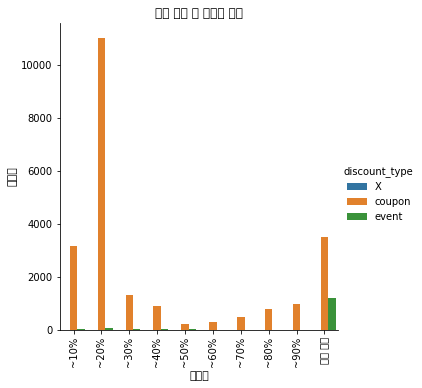

In [ ]:
#할인 타입별 할인율 분포

df_onlypay2 = df_onlypay[(df_onlypay['discount_rate']!='not discounted')]

sns.catplot(x='discount_rate', hue='discount_type', kind='count', data=df_onlypay2
            , order=['~10%','~20%','~30%','~40%','~50%','~60%','~70%','~80%','~90%','전액 할인'])
plt.title('할인 타입 별 할인율 분포')
plt.xlabel('할인율',fontsize = 11)
plt.ylabel('판매량',fontsize = 11)
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, '할인율')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_

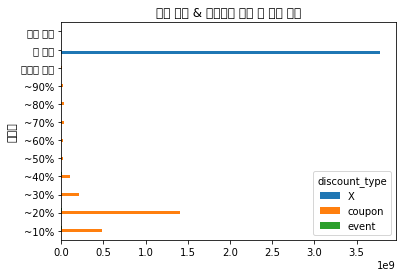

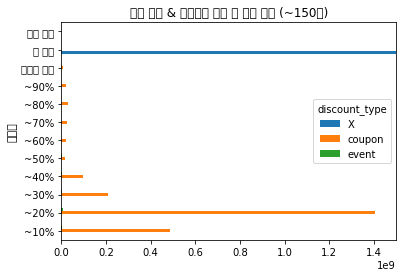

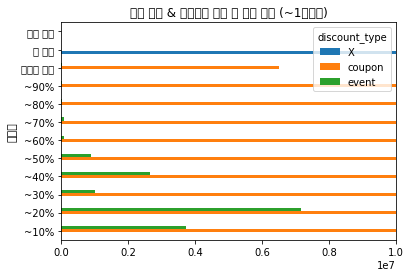

In [ ]:
pdf1 =pdf2 = pdf3 = pd.pivot_table(df_onlypay,
                      index='discount_rate',
                      columns='discount_type',
                      values = 'transaction_amount',
                      aggfunc = 'sum')


pdf1 = pdf1.replace(np.NaN,0.0)
pdf1.plot(kind='barh')
plt.title('할인 타입 & 할인율에 따른 총 판매 금액')
plt.ylabel('할인율',fontsize = 11)

pdf2 = pdf1.replace(np.NaN,0.0)
pdf2.plot(kind='barh')
plt.xlim(0,1500000000)
plt.title('할인 타입 & 할인율에 따른 총 판매 금액 (~150억)')
plt.ylabel('할인율',fontsize = 11)

pdf3 = pdf1.replace(np.NaN,0.0)
pdf3.plot(kind='barh')
plt.xlim(0,10000000)
plt.title('할인 타입 & 할인율에 따른 총 판매 금액 (~1천만원)')
plt.ylabel('할인율',fontsize = 11)

>같은 카테고리기준으로 할인 혜택을 받은 사람과 안받은 사람의 비율

In [ ]:
#카테리별로 구매내역 분류
df_catepay1 = df_pay[(df_pay['category_title']=='프로그래밍')]
df_catepay2 = df_pay[(df_pay['category_title']=='데이터사이언스')]
df_catepay3 = df_pay[(df_pay['category_title']=='업무 생산성')]
df_catepay4 = df_pay[(df_pay['category_title']=='디자인')]
df_catepay5 = df_pay[(df_pay['category_title']=='영상/3D')]
df_catepay6 = df_pay[(df_pay['category_title']=='마케팅')]
df_catepay7 = df_pay[(df_pay['category_title']=='부동산/금융')]
df_catepay8 = df_pay[(df_pay['category_title']=='투자/재테크')]

In [ ]:
#비 할인 혜택 구매자 분류
df_cp1_N = df_catepay1[not_discount]
df_cp1_N['Y/N'] = 'N'

df_cp2_N = df_catepay2[not_discount]
df_cp2_N['Y/N'] = 'N'

df_cp3_N = df_catepay3[not_discount]
df_cp3_N['Y/N'] = 'N'

df_cp4_N = df_catepay4[not_discount]
df_cp4_N['Y/N'] = 'N'

df_cp5_N = df_catepay5[not_discount]
df_cp5_N['Y/N'] = 'N'

df_cp6_N = df_catepay6[not_discount]
df_cp6_N['Y/N'] = 'N'

df_cp7_N = df_catepay7[not_discount]
df_cp7_N['Y/N'] = 'N'

df_cp8_N = df_catepay8[not_discount]
df_cp8_N['Y/N'] = 'N'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
#할인 혜택 구매자 분류
df_cp1_Y = df_catepay1[only_event]
df_cp1_Y = df_catepay1[only_coupon]
df_cp1_Y['Y/N'] = 'Y'


df_cp2_Y = df_catepay2[only_event]
df_cp2_Y = df_catepay2[only_coupon]
df_cp2_Y['Y/N'] = 'Y'


df_cp3_Y = df_catepay3[only_event]
df_cp3_Y = df_catepay3[only_coupon]
df_cp3_Y['Y/N'] = 'Y'


df_cp4_Y = df_catepay4[only_event]
df_cp4_Y = df_catepay4[only_coupon]
df_cp4_Y['Y/N'] = 'Y'


df_cp5_Y = df_catepay5[only_event]
df_cp5_Y = df_catepay5[only_coupon]
df_cp5_Y['Y/N'] = 'Y'


df_cp6_Y = df_catepay6[only_event]
df_cp6_Y = df_catepay6[only_coupon]
df_cp6_Y['Y/N'] = 'Y'


df_cp7_Y = df_catepay7[only_event]
df_cp7_Y = df_catepay7[only_coupon]
df_cp7_Y['Y/N'] = 'Y'


df_cp8_Y = df_catepay8[only_event]
df_cp8_Y = df_catepay8[only_coupon]
df_cp8_Y['Y/N'] = 'Y'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will

In [ ]:
#카테고리별 분류 통합
df_cp1 = pd.concat([df_cp1_Y ,df_cp1_N])
df_cp2 = pd.concat([df_cp2_Y ,df_cp2_N])
df_cp3 = pd.concat([df_cp3_Y ,df_cp3_N])
df_cp4 = pd.concat([df_cp4_Y ,df_cp4_N])
df_cp5 = pd.concat([df_cp5_Y ,df_cp5_N])
df_cp6 = pd.concat([df_cp6_Y ,df_cp6_N])
df_cp7 = pd.concat([df_cp7_Y ,df_cp7_N])
df_cp8 = pd.concat([df_cp8_Y ,df_cp8_N])

In [ ]:
df_cp = pd.concat([df_cp1,df_cp2,df_cp3,df_cp4,df_cp5,df_cp6,df_cp7,df_cp8])

In [ ]:
df_cp

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,Y/N
3930,488426.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-04-07 17:25:17,92000,,0.0,112000.0,NaN,TRANSFER,백엔드 개발,2021-02-01,Y
5355,395271.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-13 17:16:44,93000,,0.0,113000.0,NaN,TRANSFER,프론트엔드 개발,2021-02-02,Y
8597,270040.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:50:54,0,,0.0,1.0,NaN,PROMOTION,NaN,NaT,Y
8598,470930.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:50:57,0,,0.0,1.0,NaN,PROMOTION,NaN,NaT,Y
8600,144798.0,205142.0,PAYMENT,COMPLETED,스프링 아카데미아 15개 영상강의 코스(5월) - 샘플 강의 제공용,프로그래밍,스쿨 온라인,2021-04-27 19:51:24,0,,0.0,1.0,NaN,PROMOTION,NaN,NaT,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50791,669791.0,204633.0,PAYMENT,COMPLETED,올인원 패키지 : 아파트 말고 부동산 재테크 시작하기,투자/재테크,올인원,2021-09-23 23:31:36,232000,,0.0,232000.0,INICIS,CARD,부동산 투자,2021-04-20,N
50808,15407.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 03:23:43,329000,,0.0,329000.0,KAKAO,CARD,주식 투자,2021-07-13,N
50951,119584.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 17:15:19,329000,,0.0,329000.0,INICIS,CARD,주식 투자,2021-07-13,N
51056,578540.0,202789.0,PAYMENT,COMPLETED,올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,투자/재테크,올인원,2021-09-25 11:54:34,145000,,0.0,145000.0,KAKAO,POINT,주식 투자,2020-09-11,N


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_

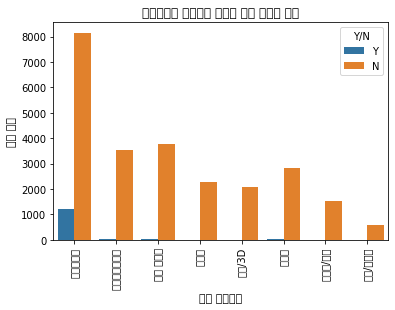

In [ ]:
sns.countplot(data=df_cp,x='category_title',hue='Y/N')
plt.title('카테고리별 할인혜택 여부에 따른 결제자 분류')
plt.xlabel('강의 카테고리',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)
plt.xticks(rotation=90)
plt.show()

재결제율

- 웰컴 할인쿠폰을 받은 사람 중 재결제한사람(신규 유입에 쿠폰의 영향?)

쿠폰할인 적용 구매자 중 '웰컴쿠폰'사용자와 'WELCOME'쿠폰 사용자가 각각 존재하므로 하나의 그룹으로 통합 시켜준다.

In [ ]:
#df_pay는 최종적으로 결제를 한 사람들의 결제기록을 모아놓은 df
#웰컴쿠폰 사용자 통합
df_welcome_group = df_pay[(df_pay['coupon_title'].str.contains('웰컴')) | (df_pay['coupon_title'].str.contains('WELCOME'))]
df_welcome_group 

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
2,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
4,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
7,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
14,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51026,646968.0,206888.0,PAYMENT,COMPLETED,올인원 패키지 : 글로벌 1위 Salesforce 디자인 디렉터의 B2B SaaS ...,디자인,올인원,2021-09-25 02:37:22,149000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,169000.0,NAVER,CARD,UX/UI,2021-08-23
51049,638903.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 10:56:03,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,KAKAO,POINT,영상 편집,2021-08-17
51053,638903.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 11:22:07,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,KAKAO,POINT,영상 편집,2020-12-02
51067,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
#할인쿠폰 사용자의 customer_id 추출
df_welcome_group.drop_duplicates(['customer_id'],keep='first')
newuser = df_welcome_group['customer_id'].unique()

# 추출한 customer_id 데이터들을 새로운 dataframe으로 생성
df_newuser_group = pd.DataFrame(newuser,columns=['customer_id'])
df_newuser_group

,customer_id
0,478028.0
1,478033.0
2,478035.0
3,471759.0
4,445723.0
...,...
10813,604077.0
10814,646968.0
10815,638903.0
10816,640697.0


In [ ]:
#새로만든 데이터프레임과 최종결제내역만 골라낸 데이터프레임 df_pay와 inner merge 
df_newuser_record = pd.merge(df_newuser_group,df_pay)
df_newuser_record

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
1,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
3,471759.0,204068.0,PAYMENT,COMPLETED,올인원 패키지 : 마디아의 UX/UI 포트폴리오,디자인,올인원,2021-03-28 15:46:22,89000,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,99000.0,NaN,CARD,UX/UI,2021-03-11
4,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14436,646968.0,206888.0,PAYMENT,COMPLETED,올인원 패키지 : 글로벌 1위 Salesforce 디자인 디렉터의 B2B SaaS ...,디자인,올인원,2021-09-25 02:37:22,149000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,169000.0,NAVER,CARD,UX/UI,2021-08-23
14437,638903.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 10:56:03,159000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,169000.0,KAKAO,POINT,영상 편집,2021-08-17
14438,638903.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 11:22:07,139000,[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.0,149000.0,KAKAO,POINT,영상 편집,2020-12-02
14439,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [ ]:
#웰컴 쿠폰 사용 내역 제거
aaa = df_newuser_record[df_newuser_record['coupon_title'].str.contains('웰컴')].index
bbb = df_newuser_record[df_newuser_record['coupon_title'].str.contains('WELCOME')].index

df_newuser_record.drop(aaa,inplace=True)
df_newuser_record.drop(bbb,inplace=True)
df_newuser_record

,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
5,445723.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-06-30 22:46:03,114000,,0.0,114000.0,INICIS,CARD,백엔드 개발,2021-02-01
8,474451.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-02 18:09:20,55300,GA4 30% 할인쿠폰,23700.0,79000.0,NaN,CARD,데이터마케팅,2021-04-02
9,474451.0,202547.0,PAYMENT,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-04-09 13:15:56,147000,,0.0,147000.0,INICIS,CARD,금융/투자 실무,2020-04-17
10,474451.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-04-28 18:21:57,120000,,0.0,120000.0,INICIS,CARD,PPT/보고서,2020-12-07
11,474451.0,201408.0,PAYMENT,COMPLETED,올인원 패키지 : 엑셀 실무 마스터,업무 생산성,올인원,2021-04-28 18:24:03,0,4월 1+1 페이백 이벤트 쿠폰,147000.0,117500.0,NaN,PROMOTION,엑셀/VBA,2019-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14408,642373.0,205423.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치...,부동산/금융,올인원,2021-09-12 10:33:05,338000,,0.0,338000.0,PAYCO,CARD,회계/재무/세무,NaT
14412,636100.0,205143.0,PAYMENT,COMPLETED,The RED : 백엔드 에센셜 : 대용량 서비스를 위한 아키텍처 with Redi...,프로그래밍,RED,2021-08-23 20:54:48,219000,,0.0,219000.0,PAYCO,CARD,백엔드 개발,NaT
14420,613775.0,NaN,PAYMENT,COMPLETED,프로모션 : 데이터 분석 맥북 pro 패스(9월 현물 프리패스),데이터사이언스,올인원,2021-09-23 00:05:01,1800000,,0.0,1800000.0,INICIS,CARD,NaN,NaT
14429,599109.0,205949.0,PAYMENT,COMPLETED,초격차 패키지 : 30개 프로젝트로 배우는 iOS 앱 개발 with Swift,프로그래밍,올인원,2021-09-23 23:35:26,171000,,0.0,171000.0,INICIS,CARD,모바일앱,2021-07-09


In [ ]:
# 웰컴쿠폰 사용 후 쿠폰 할인을 받고 구매한 그룹
ccc = (df_newuser_record['coupon_title'] == '')
df_welcom_after_x = df_newuser_record[ccc]
df_welcom_after_x['after'] = 'X'

# 웰컴쿠폰 사용 후 쿠폰 할인을 받지 않고 구매한 그룹
ddd = (df_newuser_record['coupon_title'] != '')
df_welcom_after_use = df_newuser_record[ddd]
df_welcom_after_use['after'] = 'used coupon'

# 웰컴쿠폰 after 그룹  합치기
df_welcom_after = pd.concat([df_welcom_after_x,df_welcom_after_use])
df_welcom_after

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,after
5,445723.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-06-30 22:46:03,114000,,0.0,114000.0,INICIS,CARD,백엔드 개발,2021-02-01,X
9,474451.0,202547.0,PAYMENT,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-04-09 13:15:56,147000,,0.0,147000.0,INICIS,CARD,금융/투자 실무,2020-04-17,X
10,474451.0,203499.0,PAYMENT,COMPLETED,올인원 패키지 : 100억을 움직이는 단 10장의 PPT,업무 생산성,올인원,2021-04-28 18:21:57,120000,,0.0,120000.0,INICIS,CARD,PPT/보고서,2020-12-07,X
32,478276.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-06-25 08:58:55,114000,,0.0,114000.0,KAKAO,CARD,백엔드 개발,2021-02-01,X
40,478323.0,204871.0,PAYMENT,COMPLETED,올인원 패키지 : star741의 캐주얼 일러스트 드로잉,디자인,올인원,2021-07-27 20:44:18,149000,,0.0,149000.0,KAKAO,POINT,일러스트,2021-05-25,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14330,608435.0,204373.0,PAYMENT,COMPLETED,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,올인원,2021-08-13 23:40:46,39000,7월 100% 페이백 프로모션 쿠폰,90000.0,129000.0,NAVER,CARD,PPT/보고서,2021-06-04,used coupon
14347,634346.0,205707.0,PAYMENT,COMPLETED,올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략,투자/재테크,올인원,2021-09-09 08:27:55,48000,8월 1+1 프로모션 쿠폰,291000.0,339000.0,NAVER,CARD,주식 투자,2021-06-23,used coupon
14358,630426.0,206717.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,올인원,2021-09-06 23:04:34,48000,8월 1+1 프로모션 쿠폰,120000.0,168000.0,NAVER,CARD,DevOps,2021-07-28,used coupon
14365,605431.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-08-09 10:10:01,59500,7월 100% 페이백 프로모션 쿠폰,90000.0,149500.0,INICIS,CARD,업무자동화,2020-11-25,used coupon


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54256 missing from current font.
  font.set_text(s, 0.0, flags=fl

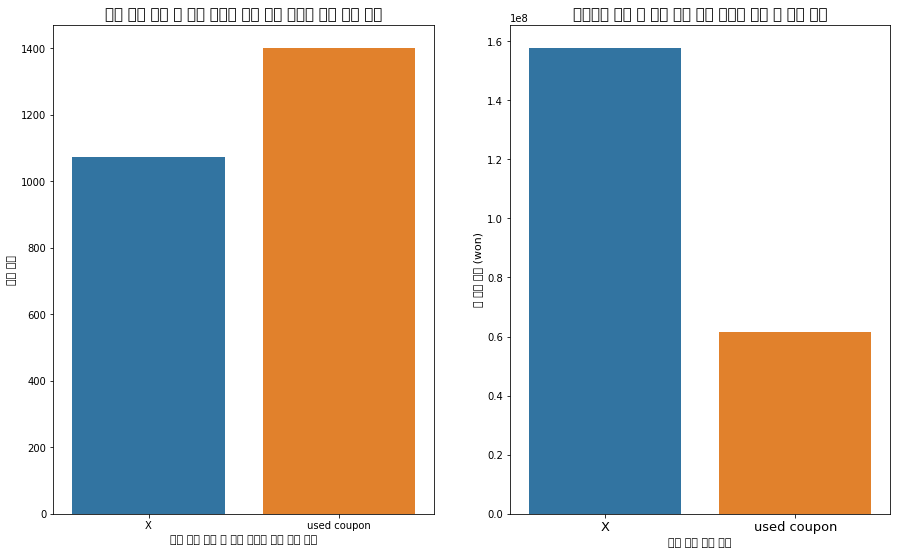

In [ ]:
#시각화
#웰컴 쿠폰 사용 후 추가 구매시 쿠폰 사용 여부에 따른 판매 수량
plt.figure(figsize=(15, 9))

plt.subplot(1,2,1)
sns.countplot(data=df_welcom_after,x='after')
plt.title('웰컴 쿠폰 사용 후 추가 구매시 쿠폰 사용 여부에 따른 판매 수량',fontsize =15)
plt.xlabel('웰컴 쿠폰 사용 후 추가 구매시 쿠폰 사용 여부',fontsize = 11)
plt.ylabel('판매 수량',fontsize = 11)

#웰컴쿠폰 사용 후 추가 쿠폰 사용 여부에 따른 총 판매 금액
revenue_of_welcome = df_welcom_after.groupby('after').transaction_amount.sum()

plt.subplot(1,2,2)
labels = ['X','used coupon']
index = np.arange(len(labels))
sns.barplot(index,revenue_of_welcome)
plt.title('웰컴쿠폰 사용 후 추가 쿠폰 사용 여부에 따른 총 판매 금액',fontsize = 15)
plt.xlabel('쿠폰 추가 사용 여부',fontsize = 11)
plt.ylabel('총 판매 금액 (won)',fontsize = 11)
plt.xticks(index,labels,fontsize = 13)

plt.show()